### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')
%config IPCompleter.greedy=True
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Data_Loading

In [2]:
df=pd.read_csv(r"C:/Users/NANDAKUMAR/Desktop/SUMITHRA/DATASCIENCE/Data set/FuelConsumption.csv") 
df.head(2)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221


In [3]:
#df.to_csv('FuelConsumption.csv')

# EDA

In [4]:
df. shape


(1067, 13)

In [5]:
df.isna().sum() 

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df. describe ()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [8]:
%matplotlib inline

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [10]:
for i in df.columns:
    a=df[i].nunique()
    print('{}-{}'.format(i,a))

MODELYEAR-1
MAKE-39
MODEL-663
VEHICLECLASS-16
ENGINESIZE-45
CYLINDERS-7
TRANSMISSION-22
FUELTYPE-4
FUELCONSUMPTION_CITY-167
FUELCONSUMPTION_HWY-118
FUELCONSUMPTION_COMB-148
FUELCONSUMPTION_COMB_MPG-43
CO2EMISSIONS-159


In [11]:
#Get the fuel types
df['FUELTYPE'].unique()

array(['Z', 'D', 'X', 'E'], dtype=object)

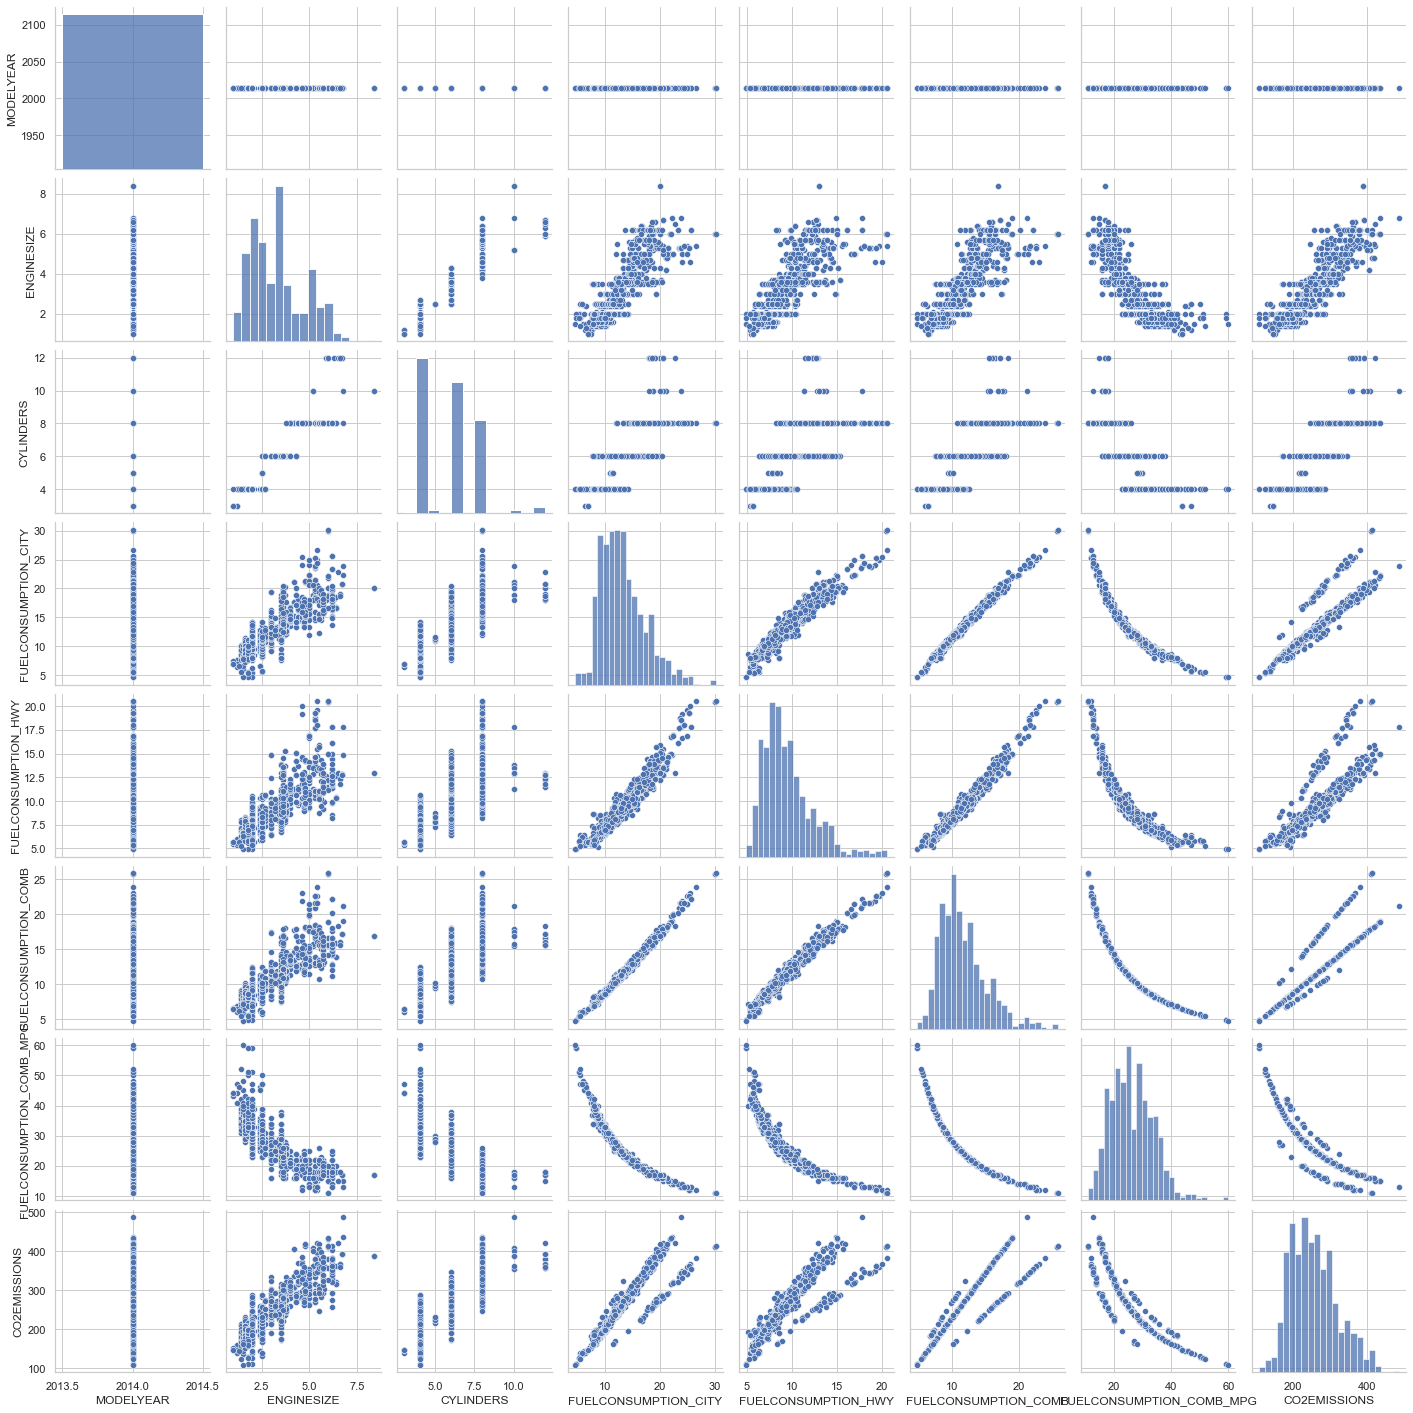

In [57]:
sns.set(style='whitegrid',color_codes=True)
sns.pairplot(df,palette='husl')

<AxesSubplot:>

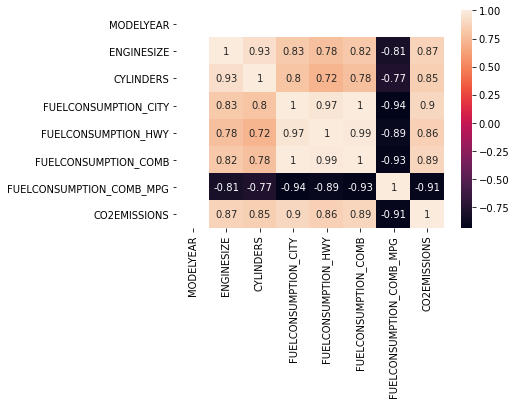

In [13]:
sns.heatmap(df.corr(),annot=True)

In [14]:
FUELTYPE=pd.get_dummies(df['FUELTYPE'],prefix='Fuel',drop_first=True)
data=pd.concat([df,FUELTYPE],axis=1)
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS,Fuel_E,Fuel_X,Fuel_Z
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196,0,0,1
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221,0,0,1
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136,0,0,1
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255,0,0,1
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244,0,0,1


# Model_Inputs

In [15]:
X=data.drop(['FUELCONSUMPTION_COMB_MPG','FUELTYPE','CO2EMISSIONS','MAKE','MODEL','FUELCONSUMPTION_HWY','CYLINDERS','ENGINESIZE','VEHICLECLASS','TRANSMISSION','FUELCONSUMPTION_COMB','MODELYEAR'],axis=1)
y=data['CO2EMISSIONS']
y.shape
X.columns

(1067,)

Index(['FUELCONSUMPTION_CITY', 'Fuel_E', 'Fuel_X', 'Fuel_Z'], dtype='object')

In [16]:
X.head(2)

,FUELCONSUMPTION_CITY,Fuel_E,Fuel_X,Fuel_Z
0,9.9,0,0,1
1,11.2,0,0,1


<AxesSubplot:>

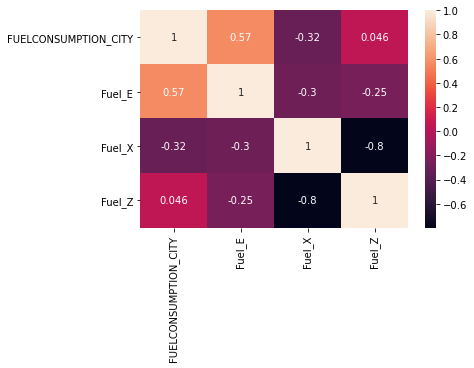

In [17]:
sns.heatmap(X.corr(),annot=True)

In [18]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['Features']=X.columns
vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(len(X.columns))]
vif

,Features,VIF
0,FUELCONSUMPTION_CITY,14.839218
1,Fuel_E,3.876898
2,Fuel_X,6.261399
3,Fuel_Z,6.700921


# Test & Train Selection

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

# Linear Regression Model

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
LR=LinearRegression()

# Train Model Scores

In [23]:
LR.fit(X_train,y_train)

LinearRegression()

In [24]:
LR.score(X_train,y_train)

0.9810525076252217

In [25]:
y_train_pred=LR.predict(X_train)

In [26]:
from sklearn.metrics import mean_squared_error

# Train Error

In [27]:
TRAIN_ERROR=mean_squared_error(y_train,y_train_pred)
print(TRAIN_ERROR)

73.99393373636244


In [28]:
from sklearn.metrics import r2_score

# Train R2_Score

In [29]:
R2_TRAIN=r2_score(y_train,y_train_pred)
print(R2_TRAIN)

0.9810525076252217


# TESTING THE MODEL

In [30]:
LR.fit(X_test,y_test)

LinearRegression()

# Test Scores

In [31]:
LR.score(X_test,y_test)

0.9848638881787587

In [32]:
y_test_pred=LR.predict(X_test)
y_test_pred.shape

(267,)

In [33]:
from sklearn.metrics import mean_squared_error

# Test_Error

In [34]:
TEST_ERROR=mean_squared_error(y_test,y_test_pred)
print(TEST_ERROR)

65.2229536508068


In [35]:
from sklearn.metrics import r2_score

# Test R2_Score

In [36]:
R2_TEST=r2_score(y_test,y_test_pred)
print(R2_TEST)

0.9848638881787587


# Train & Test Values

In [42]:
print('TRAIN_ERROR :',TRAIN_ERROR) 
print('TEST_ERROR  :',TEST_ERROR)
print('R2_TRAIN    :',R2_TRAIN*100)
print('R2_TEST     :',R2_TEST*100)

TRAIN_ERROR : 73.99393373636244
TEST_ERROR  : 65.2229536508068
R2_TRAIN    : 98.10525076252216
R2_TEST     : 98.48638881787586


### Final Model

In [38]:
model=LinearRegression()
model.fit(X_train,y_train)
model_score=model.score(X_test,y_test)
print('Accuracy :',model_score)

LinearRegression()

Accuracy : 0.9838266105358405


In [47]:
X.head(2)

,FUELCONSUMPTION_CITY,Fuel_E,Fuel_X,Fuel_Z
0,9.9,0,0,1
1,11.2,0,0,1


In [43]:
def predict_co2emission(FUELCONSUMPTION_CITY,FuelType):
    fueltype='Fuel_'+FuelType
    x=np.zeros(len(X.columns))
    try:
        Fuel=X.columns.get_loc(fueltype)  #get the index value of the fueltype in search  
        #To replicate'X',fill row values with '0'.Later it can b changed
        x[0]=FUELCONSUMPTION_CITY
        x[Fuel]=1
    except:
        x[0]=FUELCONSUMPTION_CITY
    return model.predict([x])[0]    

In [44]:
predict_co2emission(10,'D')

232.05847324750167

### Save Model

In [48]:
import pickle
with open('Co2 emission city.pkl','wb') as f:
    pickle.dump(model,f) 

In [49]:
import json
columns={
        'fueltypes':[x.upper() for x in X.columns]
}
with open('columns.json','w') as f:
    json.dump(columns,f)
    f.close()